# Loading and Inspecting Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load dataset from scikit-learn
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

# Preview basic info
display(df.head())
print("\nShape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes.value_counts())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Shape: (569, 31)

Columns:
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Data types:
 float64    30
int64       1
Name: count, dtype: int64


# Exploring Dataset

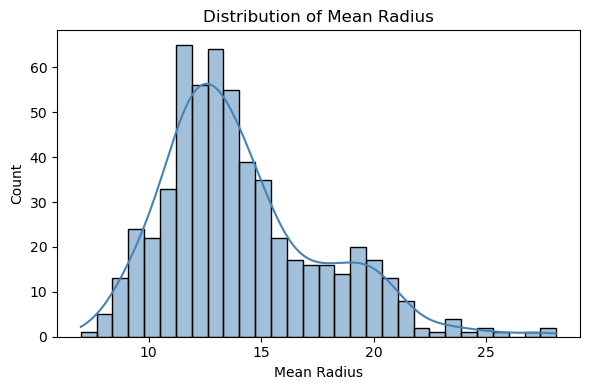

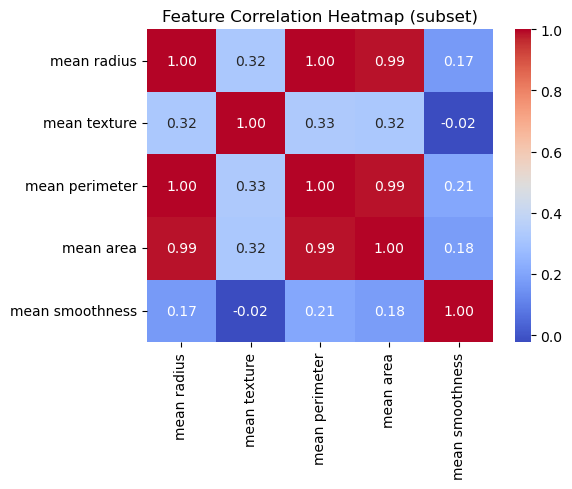

/tmp/ipykernel_981013/2515567743.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


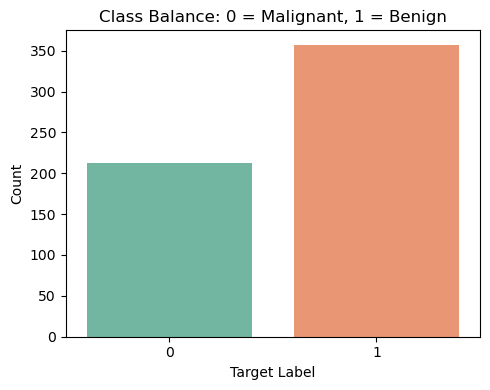

/tmp/ipykernel_981013/2515567743.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


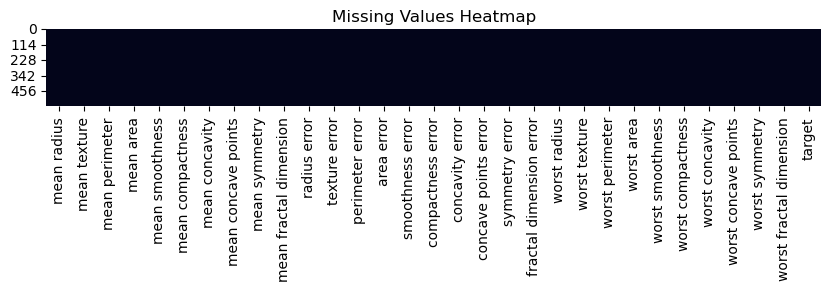

EDA figures saved in ../../figures/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../../figures", exist_ok=True)

# 1. Distribution of a key feature (mean radius)
plt.figure(figsize=(6,4))
sns.histplot(df["mean radius"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../../figures/eda_distribution_mean_radius.png", dpi=200)
plt.show()

# 2. Correlation heatmap for a subset of important features
subset = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness"]
plt.figure(figsize=(6,5))
sns.heatmap(df[subset].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (subset)")
plt.tight_layout()
plt.savefig("../../figures/eda_correlation_heatmap.png", dpi=200)
plt.show()

# 3. Class balance (benign vs malignant)
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Class Balance: 0 = Malignant, 1 = Benign")
plt.xlabel("Target Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../../figures/eda_class_balance.png", dpi=200)
plt.show()

# 4. Check for missing values
plt.figure(figsize=(10,1))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.savefig("../../figures/eda_missing_values.png", dpi=200)
plt.show()

print("EDA figures saved in ../../figures/")


# Baseline Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Split the dataset
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create pipeline with scaling + logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("Baseline Model: Logistic Regression\n")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Baseline Model: Logistic Regression

Accuracy: 0.9825
F1 Score: 0.9861
ROC-AUC: 0.9954

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

